## Actividad 4: Dora Novoa

5 ptos Cargar la base de datos kmeans1.csv utilizando pandas.

5 ptos Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter plot) de las variables A y B.

5 ptos Aplique el algoritmo k-means (from sklearn.cluster import KMeans), observe y analice los outputs disponibles (centroides, clusters asignados y distancia dentro de las clases).

5 ptos Ajuste k-means considerando 1,2,...10 clusters, guarde la distancia intra clases en un diccionario. Estudie la documentación de la clase y modifique los argumentos init, n init y max it.

5 ptos Utilizando matplotlib (o seaborn) genere un gráfico que presente la distancia intra clases para cada k utilizado. A través del criterio del codo defina el número de clusters óptimo.

In [93]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

In [94]:
df = pd.read_csv("datos/kmeans.1.csv", delimiter=",")
df

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


In [172]:
def graficar(x,y, titulo:str=None, farbe:str="red", labelx:str="X", labely:str="Y", verGrid:bool=False):
    plt.plot(x, y, 'o', color=farbe, alpha=0.4)
    if titulo:
        plt.title(titulo)
    plt.grid(verGrid)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

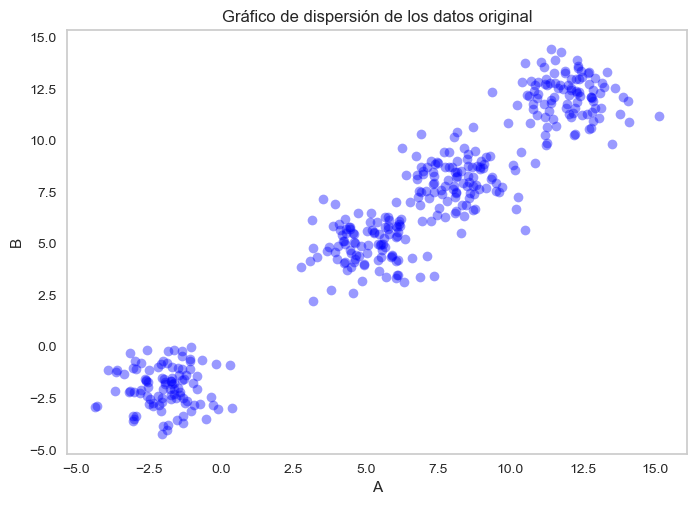

In [173]:
A = df["A"].values
B = df["B"].values
graficar(df["A"], df["B"], titulo="Gráfico de dispersión de los datos original", farbe="blue", labelx="A", labely="B")


**Obs.** Acá se visualiza los datos originales y tienen 4 clusters. 

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

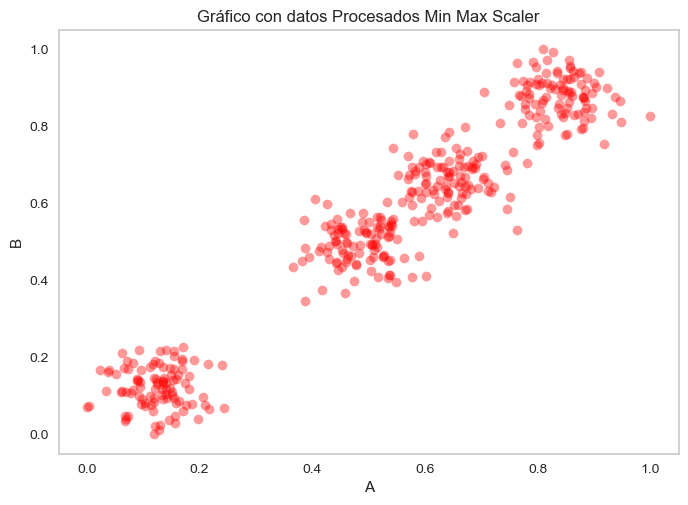

In [174]:
from sklearn.preprocessing import MinMaxScaler
df_scaler = MinMaxScaler().fit_transform(df)
A = df_scaler[:,0]
B = df_scaler[:,1]
graficar(A, B, "Gráfico con datos Procesados Min Max Scaler", "red", "A", "B")

In [133]:
from threadpoolctl import threadpool_limits

with threadpool_limits(limits=2):  # Limita a 2 hilos
    from sklearn.cluster import KMeans
    # KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(df_scaler)
    centroides = kmeans.cluster_centers_
    etiquetas = kmeans.labels_
    inercia = kmeans.inertia_
    print("Centroides: ", centroides)
    print("Clusters asignados (etiquetas):\n", etiquetas)
    print("Inercia (distancia intra-clase total):\n", inercia)

Centroides:  [[0.48395258 0.49330798]
 [0.12488096 0.1225848 ]
 [0.64504777 0.66137917]
 [0.83902637 0.87789952]]
Clusters asignados (etiquetas):
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Inercia (distancia intra-clase total):
 2

{1: 60.00208300828672, 2: 15.793568251801174, 3: 4.777830629096789, 4: 2.1761149778977487, 5: 1.9664705993115783, 6: 1.7723134463746835, 7: 1.5645892951125773, 8: 1.3677379217886592, 9: 1.2481517021423953, 10: 1.1370613824849158}


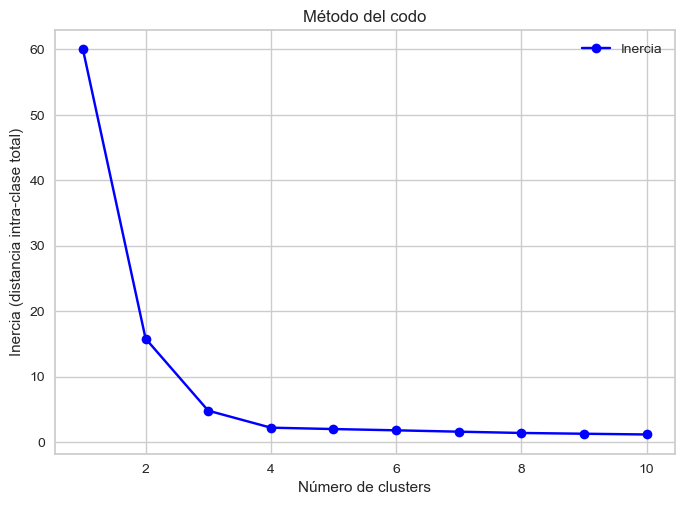

In [155]:
with threadpool_limits(limits=2):
    resultado = {}
    for k in range (1,11):
        kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, init="k-means++", n_init=10)
        kmeans.fit(df_scaler)
        resultado[k] = kmeans.inertia_      #distancia intra-clase total   
        
    print(resultado)
    plt.plot(list(resultado.keys()), list(resultado.values()), 'o-', color="blue")
    plt.xlabel("Número de clusters")
    plt.ylabel("Inercia (distancia intra-clase total)")
    plt.title("Método del codo")
    plt.legend(["Inercia"])
    plt.grid(True)

Se puede observar que con 4 cluster se mantiene la inercia.

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>

## 2.2 Análisis de clusters (30 ptos)

5 ptos Aplicar el algoritmo k-means a la base de datos k-means2.csv. Aplique el procesamiento necesario a los datos para una correcta asignación de clusters.

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


{1: 14469.699238126044, 2: 10314.771740203658, 3: 7754.558201854756, 4: 6625.930786573357, 5: 5589.337995471549, 6: 5085.493530909847, 7: 4732.791961993333, 8: 4442.947629486103, 9: 4198.074995384231, 10: 4023.190534285405}


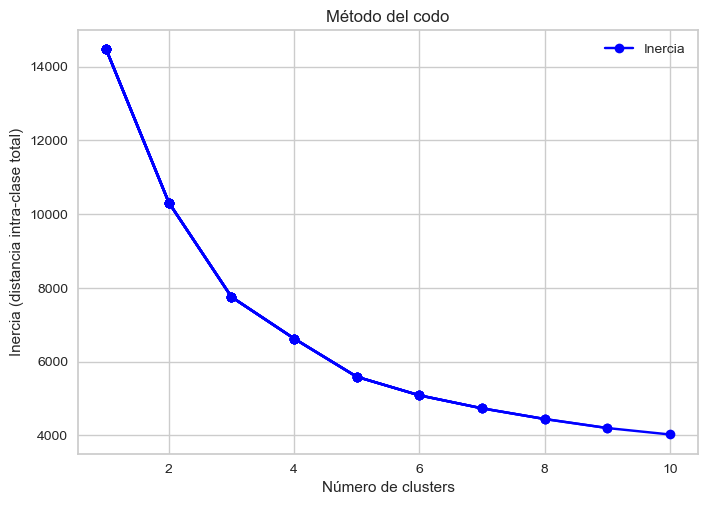

In [153]:
df2 = pd.read_csv("datos/kmeans2.csv", delimiter=",")
#print(df2.isna().sum())
df2_scaler = MinMaxScaler().fit_transform(df2)

with threadpool_limits(limits=2):
    resultado = {}
    for k in range (1,11):
        kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, init="k-means++", n_init=10)
        kmeans.fit(df2_scaler)
        resultado[k] = kmeans.inertia_      #distancia intra-clase total   
        plt.plot(list(resultado.keys()), list(resultado.values()), 'o-', color="blue")
    print(resultado)
    plt.xlabel("Número de clusters")
    plt.ylabel("Inercia (distancia intra-clase total)")
    plt.title("Método del codo")
    plt.legend(["Inercia"])
    plt.grid(True)

Se visualiza el nro. de clusters vs la inercia.

<div style="height: 5px; background: linear-gradient(to right, cyan, lime); margin-bottom: 20px;"></div>
10 ptos Determine el número de clusters adecuados con alguno de los tres métodos vistos en clases (regla del codo, Davies-Bouldin o Silhouette plot). Genere una función (o un conjunto de funciones) que le permita obtener el reporte de las métricas y visualizaciones.

Ver documentación [aquí](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)